In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from soliket import BinnedClusterLikelihood
from cobaya.model import get_model
import camb
from astropy.io import fits
from astropy import table
from astLib import astWCS
import math
from nemo import completeness, MockSurvey

import sys
sys.path.append('../')
import nemo_mocks
import imp
imp.reload(nemo_mocks)

<module 'nemo_mocks' from '/Users/eunseonglee/SOLikeT/soliket/clusters/notebooks/../nemo_mocks.py'>

In [2]:
params = {
    'h': 0.68,
    'n_s': 0.965,
    'Omega_b': 0.049,      
    'Omega_c': 0.261, 
    'sigma8': 0.81,
    'tenToA0': 1.9e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'm_nu': 0.,
    'C0': 2.

}

path2data ='/Users/eunseonglee/SOLikeT/soliket/clusters/data/advact/DR5CosmoSims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/'\
'NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/'

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
    'verbose': True,
    'data': {
        'data_path': path2data,
        'cat_file': "NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_mass.fits",
        'Q_file': "selFn/QFit.fits",
        'tile_file': "selFn/tileAreas.txt",
        'rms_file': "selFn/RMSTab.fits"
    },
    'theorypred': {
        'choose_theory': "CCL",
        'massfunc_mode': 'ccl',
        'compl_mode': 'erf_diff',
        'md_hmf': '200c',
        'md_ym': '200c'
        
    },
    'YM': {
        'Mpivot': 4.25e14
    },
    'selfunc': {
        'SNRcut': 5.,
        'method': 'SNRbased',
        'whichQ': 'injection',
        'resolution': 'downsample',
        'dwnsmpl_bins': 100,
        'save_dwsmpld': False,
    },
    'binning': {
        'z': {
            'zmin': 0.,
            'zmax': 2.0,
            'dz': 0.1
        },
        'q': {
            'log10qmin': 0.6,
            'log10qmax': 2.0,
            'dlog10q': 0.25
        },
        'M': {
            'Mmin': 5e13,
            'Mmax': 1e16,
            'dlogM': 0.01
        }
    }
    }},
    'theory': {'soliket.clusters.CCL': 
               {'transfer_function': 'boltzmann_camb',
                'matter_pk': 'halofit',
                'baryons_pk': 'nobaryons',
                'md_hmf': '200c'}}
}

# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']
model.loglikes({})[0]

Initializing clusters.py Binned Clusters
Running SNR based selection function.
Using averaged Q from source injection.
Running completeness with down-sampled selection function inputs.
Total number of clusters in catalogue = 5738.
SNR cut = 5.0.
Number of clusters above the SNR cut = 3169.
The lowest redshift = 0.01
The highest redshift = 1.96
The lowest SNR = 5.00.
The highest SNR = 51.99.
Reading in full Q function.
Initial number of tiles = 280.
Number of tiles after removing the tiles with zero area = 264. 
Reading in full RMS table.
Number of RMS values = 40672.
Down-sampling RMS and Q function using 100 bins.
Number of down-sampled RMS = 100.
Number of down-sampled Q funcs = 100.
Entire survey area = 13631.324739141015 deg2.
Number of redshift bins = 20.
Number of SNR bins = 6.
Number of redshift points for theory calculation = 200.
Number of mass points for theory calculation = 530.
 Total predicted 2D N = 2914.866332304512
Number of clusters in redshift bin 0: 19.22133866446588

 ::: 2D ln likelihood =  161.0196253903858


array([-161.01962539])

In [3]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 1.9e-05,
    'B0': 0.08,
    'C0': 2.,
    'scatter_sz': 0.,
    'bias_sz': 1.  
}

In [4]:
Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

Nq = np.zeros(len(q))
catNq = np.zeros(len(q))
for i in range(len(q)):
    Nq[i] = Nzq[:,i].sum()    
    catNq[i] = catNzq[:,i].sum()

 Total predicted 2D N = 2914.866332304512
Number of clusters in redshift bin 0: 19.221338664465883.
Number of clusters in redshift bin 1: 303.66031427024393.
Number of clusters in redshift bin 2: 437.3405080937954.
Number of clusters in redshift bin 3: 456.85717205043443.
Number of clusters in redshift bin 4: 412.1891190946041.
Number of clusters in redshift bin 5: 343.04635461352007.
Number of clusters in redshift bin 6: 270.4412194904809.
Number of clusters in redshift bin 7: 203.83736665016897.
Number of clusters in redshift bin 8: 148.50011255777852.
Number of clusters in redshift bin 9: 105.23886818800673.
Number of clusters in redshift bin 10: 72.88556197695006.
Number of clusters in redshift bin 11: 49.540326533697474.
Number of clusters in redshift bin 12: 33.155855467111195.
Number of clusters in redshift bin 13: 21.899709598785485.
Number of clusters in redshift bin 14: 14.303248384509745.
Number of clusters in redshift bin 15: 9.253132442556007.
Number of clusters in redshif

In [5]:
Nz = np.zeros(len(z))
catNz = np.zeros(len(z))
for i in range(len(z)):
    Nz[i] = Nzq[i, :].sum()    
    catNz[i] = catNzq[i, :].sum()

In [6]:
bin_params = info['likelihood']['soliket.BinnedClusterLikelihood']['binning']

zbins = np.arange(bin_params['z']['zmin'], bin_params['z']['zmax'] + bin_params['z']['dz'], \
                  bin_params['z']['dz'])

logqmin = bin_params['q']['log10qmin']
logqmax = bin_params['q']['log10qmax']
dlogq = bin_params['q']['dlog10q']

# TODO: I removed the bin where everything is larger than qmax - is this ok?
qbins = 10**np.arange(logqmin, logqmax+dlogq, dlogq)

In [7]:
mockconfig_pred = {
    'predSNRCut': 5,
    'path2truthcat': '/Users/eunseonglee/SOLikeT/soliket/clusters/data/advact/DR5CosmoSims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_truthCatalog.fits',   
    'path2noisemap': path2data+'selFn/stitched_RMSMap_Arnaud_M2e14_z0p4.fits',
    'path2selFn': path2data+'selFn',
    'path2Qfunc': path2data+'selFn/QFit.fits',
    'relativisticCorrection': False,
    'rhoType': 'critical',
    'massFunc': 'Tinker08',
    'delta': 200,
    'applyPoissonScatter': False,
    'predAreaScale': 1.000, 
    'makeMock': True,
    'selFnZStep': 0.01,
    'method': 'fast',
    'QSource': 'injection'
}

In [8]:
nemoNz = nemo_mocks.get_nemo_pred(mockconfig_pred, zbins)

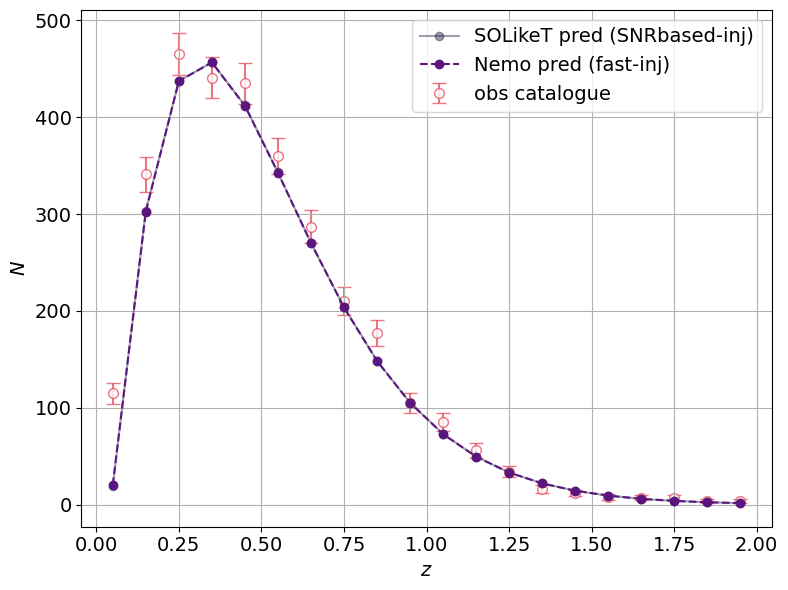

In [9]:
color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

plt.figure(figsize=(8,6))
plt.plot(z, Nz, color=color_list[0], marker='o', alpha=0.4, label='SOLikeT pred (SNRbased-inj)')
plt.plot(z, nemoNz, color=color_list[3], marker='o', linestyle='--', alpha=1, label='Nemo pred (fast-inj)')
plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color=color_list[9], fmt='o', ms=7, mfc='white', zorder=0, capsize=5, capthick=1, ls='none', alpha=0.8, label='obs catalogue')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim(0, 2.0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('0Nz_SNRbased-inj.pdf')
plt.savefig('0Nz_SNRbased-inj.png')
plt.show()

In [10]:
obs = catNz
exp = Nz

chi2 = (np.power(obs - exp, 2) / exp).sum()

print("chi2 : ", chi2)
print("dof : ", len(exp))

chi2 :  506.87303779469954
dof :  20


In [11]:
obs = catNq
exp = Nq

chi2 = (np.power(obs - exp, 2) / exp).sum()

print("chi2 : ", chi2)
print("dof : ", len(exp))

chi2 :  30.5171511823263
dof :  6


In [12]:
nemoNz.sum()

2913.550743490729

In [13]:
Nz.sum()

2914.866332304512

In [14]:
catNz.sum()

3169.0

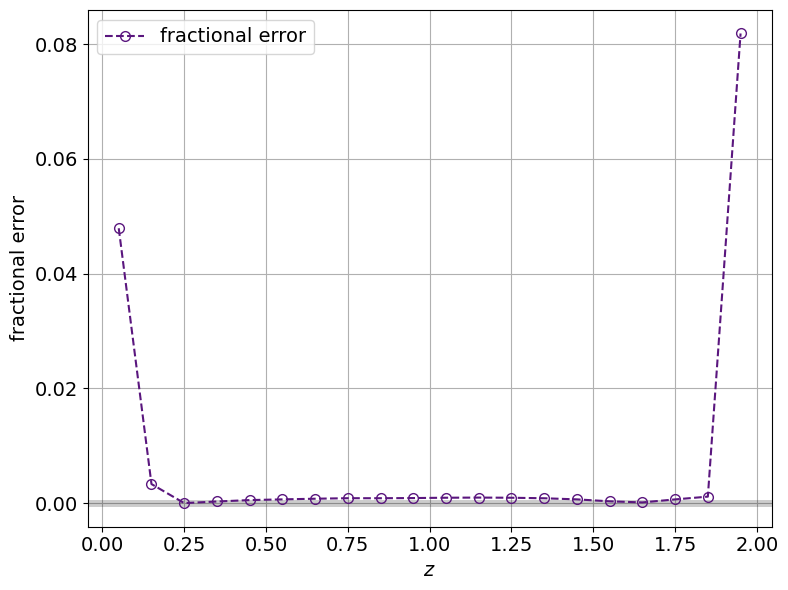

In [15]:
plt.figure(figsize=(8,6))
plt.axhline(y=0, lw=5, c='k', alpha=0.2)
plt.plot(z, np.abs(Nz/nemoNz-1), color=color_list[3], marker='o', ls='--', mfc='none', ms=7, label='fractional error')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('fractional error', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
#plt.xlim(0, 2.0)
plt.grid()
plt.tight_layout()
plt.savefig('0Nz_SNRbased-inj_frac.pdf')
plt.savefig('0Nz_SNRbased-inj_frac.png')
plt.show()

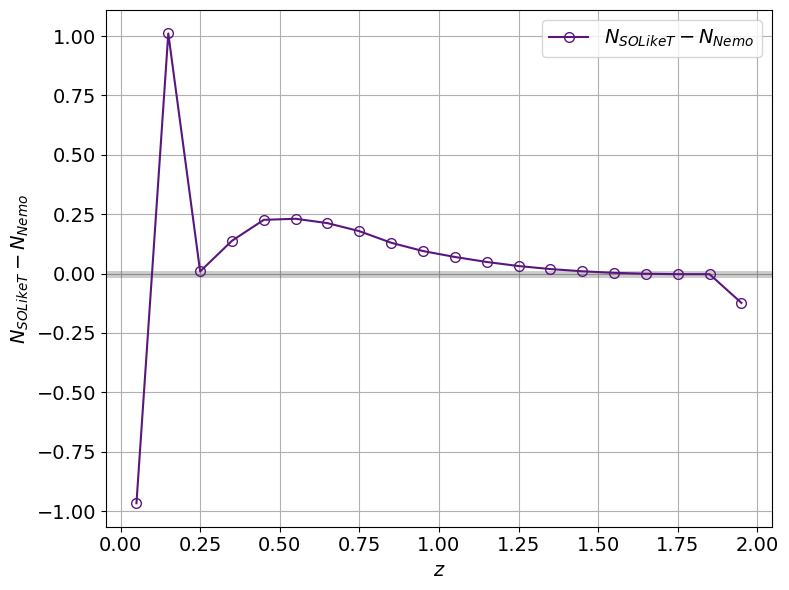

In [16]:
plt.figure(figsize=(8,6))
plt.axhline(y=0, lw=5, c='k', alpha=0.2)
plt.plot(z, Nz-nemoNz, color=color_list[3], marker='o', ls='-', mfc='none', ms=7, label='$N_{SOLikeT}-N_{Nemo}$')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N_{SOLikeT}-N_{Nemo}$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('0Nz_SNRbased-inj_diff.pdf')
plt.savefig('0Nz_SNRbased-inj_diff.png')
plt.show()

In [17]:
Nz-nemoNz

array([-9.67137703e-01,  1.01091291e+00,  8.93292835e-03,  1.38042946e-01,
        2.26244953e-01,  2.30719489e-01,  2.12333614e-01,  1.78631269e-01,
        1.29726917e-01,  9.47906221e-02,  6.98733483e-02,  4.87632341e-02,
        3.17010623e-02,  1.89423688e-02,  9.61343604e-03,  3.08843288e-03,
       -8.39769155e-04, -2.52454585e-03, -2.75387811e-03, -1.23472817e-01])

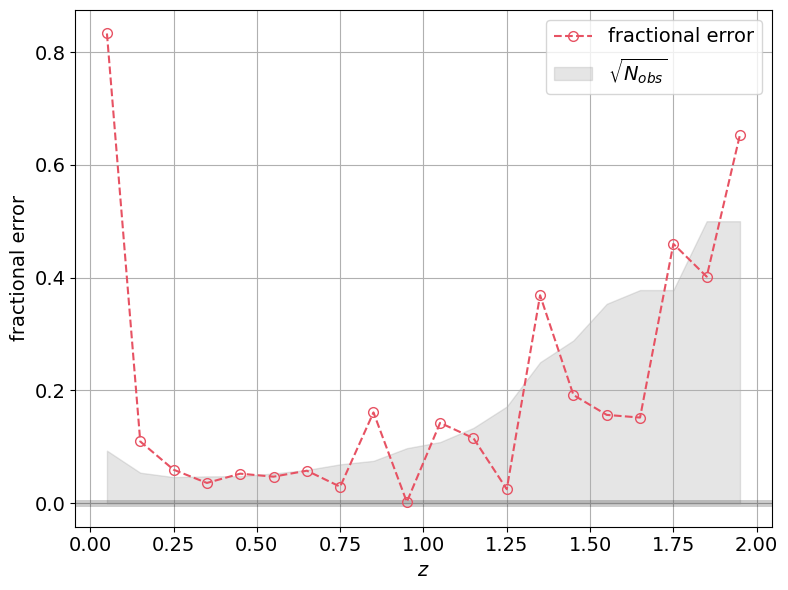

In [18]:
plt.figure(figsize=(8,6))
plt.axhline(y=0, lw=5, c='k', alpha=0.2)
plt.plot(z, np.abs(Nz/catNz-1), color=color_list[9], marker='o', ls='--', mfc='none', ms=7, label='fractional error')
plt.fill_between(z, 0, np.sqrt(catNz)/catNz, alpha=0.2, color='gray', label='$\sqrt{N_{obs}}$')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('fractional error', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
#plt.xlim(0, 2.0)
plt.grid()
plt.tight_layout()
plt.savefig('0Nz_SNRbased-inj_obs_frac.pdf')
plt.savefig('0Nz_SNRbased-inj_obs_frac.png')
plt.show()

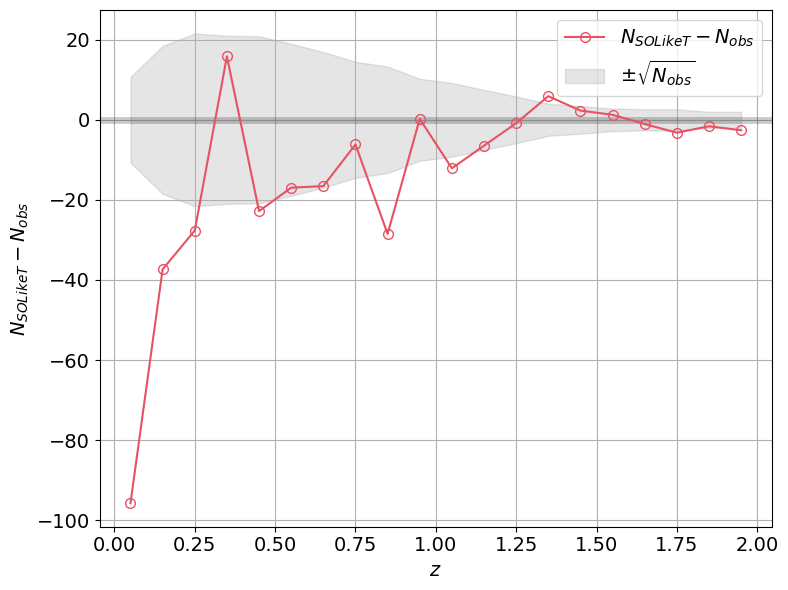

In [19]:
plt.figure(figsize=(8,6))
plt.axhline(y=0, lw=5, c='k', alpha=0.2)
plt.plot(z, Nz-catNz, color=color_list[9], marker='o', ls='-', mfc='none', ms=7, label='$N_{SOLikeT}-N_{obs}$')
plt.fill_between(z, -np.sqrt(catNz), np.sqrt(catNz), alpha=0.2, color='gray', label='$\pm\sqrt{N_{obs}}$')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N_{SOLikeT}-N_{obs}$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('0Nz_SNRbased-inj_obs_diff.pdf')
plt.savefig('0Nz_SNRbased-inj_obs_diff.png')
plt.show()

In [20]:
catNz

array([115., 341., 465., 441., 435., 360., 287., 210., 177., 105.,  85.,
        56.,  34.,  16.,  12.,   8.,   7.,   7.,   4.,   4.])

In [21]:
Nz

array([ 19.22133866, 303.66031427, 437.34050809, 456.85717205,
       412.18911909, 343.04635461, 270.44121949, 203.83736665,
       148.50011256, 105.23886819,  72.88556198,  49.54032653,
        33.15585547,  21.8997096 ,  14.30324838,   9.25313244,
         5.93672945,   3.78112633,   2.39299435,   1.3852741 ])

In [22]:
nemoNz

array([ 20.18847637, 302.64940136, 437.33157517, 456.7191291 ,
       411.96287414, 342.81563512, 270.22888588, 203.65873538,
       148.37038564, 105.14407757,  72.81568863,  49.4915633 ,
        33.1241544 ,  21.88076723,  14.29363495,   9.25004401,
         5.93756922,   3.78365087,   2.39574823,   1.50874692])

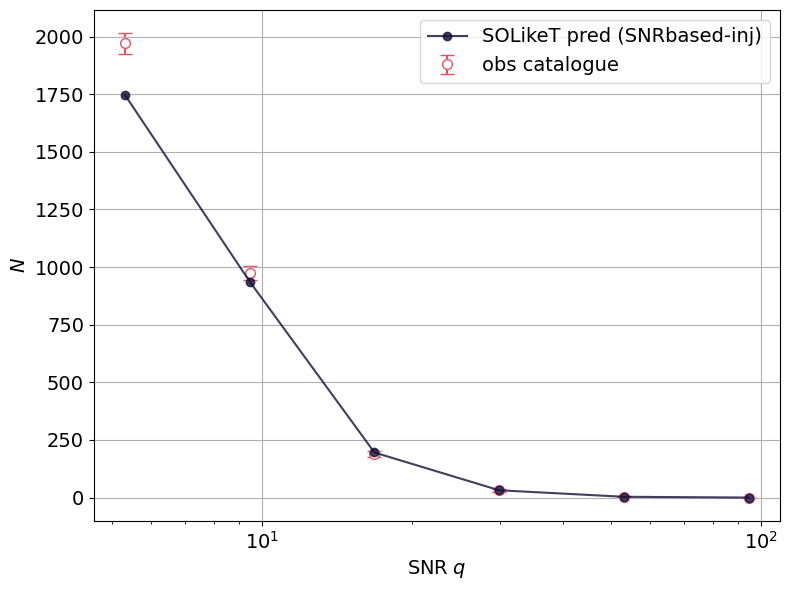

In [23]:
plt.figure(figsize=(8,6))
plt.plot(q, Nq, color=color_list[0], marker='o', alpha=0.8, label='SOLikeT pred (SNRbased-inj)')
plt.errorbar(q, catNq, yerr=np.sqrt(catNq), color=color_list[9], fmt='o', ms=7, mfc='white', zorder=0, capsize=5, capthick=1, ls='none', alpha=1, label='obs catalogue')
plt.xlabel('SNR $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(0, 2.0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('0Nq_SNRbased-inj.pdf')
plt.savefig('0Nq_SNRbased-inj.png')
plt.show()

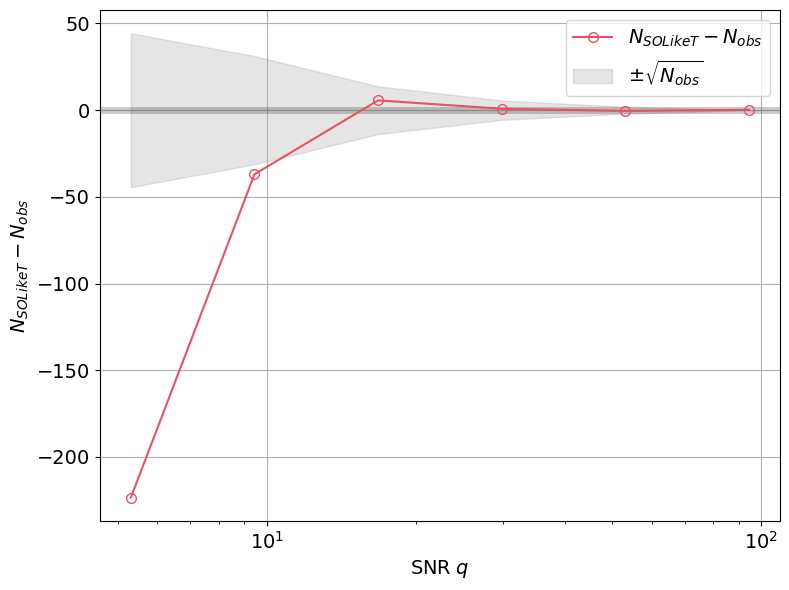

In [24]:
plt.figure(figsize=(8,6))
plt.axhline(y=0, lw=5, c='k', alpha=0.2)
plt.plot(q, Nq-catNq, color=color_list[9], marker='o', ls='-', mfc='none', ms=7, label='$N_{SOLikeT}-N_{obs}$')
plt.fill_between(q, -np.sqrt(catNq), np.sqrt(catNq), alpha=0.2, color='gray', label='$\pm\sqrt{N_{obs}}$')
plt.xlabel('SNR $q$', fontsize=14)
plt.ylabel('$N_{SOLikeT}-N_{obs}$', fontsize=14)
plt.xscale('log')
# plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('0Nq_SNRbased-inj_obs_diff.pdf')
plt.savefig('0Nq_SNRbased-inj_obs_diff.png')
plt.show()

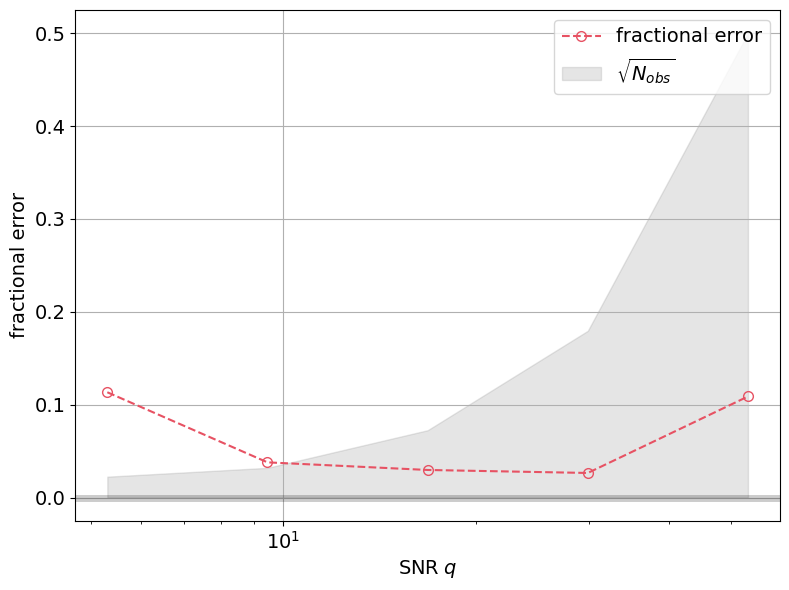

In [25]:
plt.figure(figsize=(8,6))
plt.axhline(y=0, lw=5, c='k', alpha=0.2)
plt.plot(q, np.abs(Nq/catNq-1), color=color_list[9], marker='o', ls='--', mfc='none', ms=7, label='fractional error')
plt.fill_between(q, 0, np.sqrt(catNq)/catNq, alpha=0.2, color='gray', label='$\sqrt{N_{obs}}$')
plt.xlabel('SNR $q$', fontsize=14)
plt.ylabel('fractional error', fontsize=14)
plt.xscale('log')
# plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
#plt.xlim(0, 2.0)
plt.grid()
plt.tight_layout()
plt.savefig('0Nq_SNRbased-inj_obs_frac.pdf')
plt.savefig('0Nq_SNRbased-inj_obs_frac.png')
plt.show()

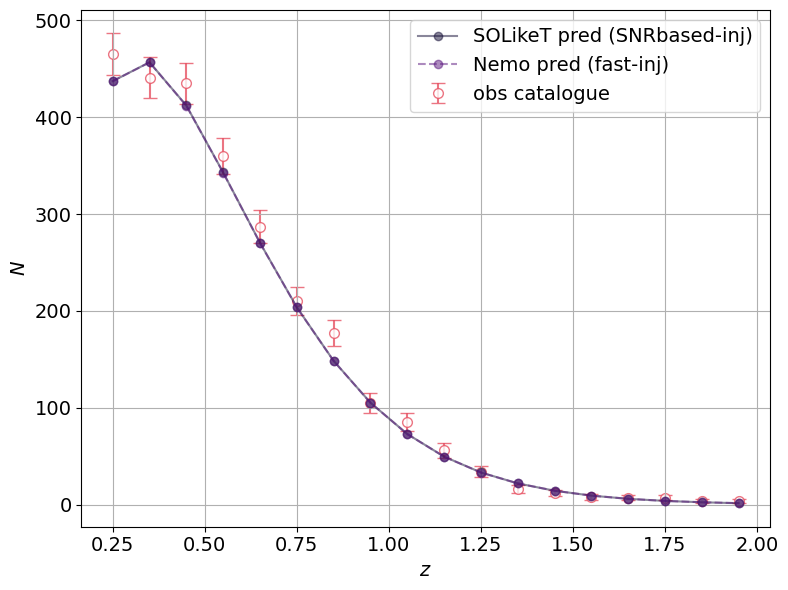

In [26]:
plt.figure(figsize=(8,6))
plt.plot(z[2:], Nz[2:], color=color_list[0], marker='o', alpha=0.5, label='SOLikeT pred (SNRbased-inj)')
plt.plot(z[2:], nemoNz[2:], color=color_list[3], marker='o', linestyle='--', alpha=0.5, label='Nemo pred (fast-inj)')
plt.errorbar(z[2:], catNz[2:], yerr=np.sqrt(catNz[2:]), color=color_list[9], fmt='o', ms=7, mfc='white', zorder=0, capsize=5, capthick=1, ls='none', alpha=0.8, label='obs catalogue')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim(0, 2.0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('0Nz_SNRbased-inj_ex2zbins.pdf')
plt.savefig('0Nz_SNRbased-inj_ex2zbins.png')
plt.show()

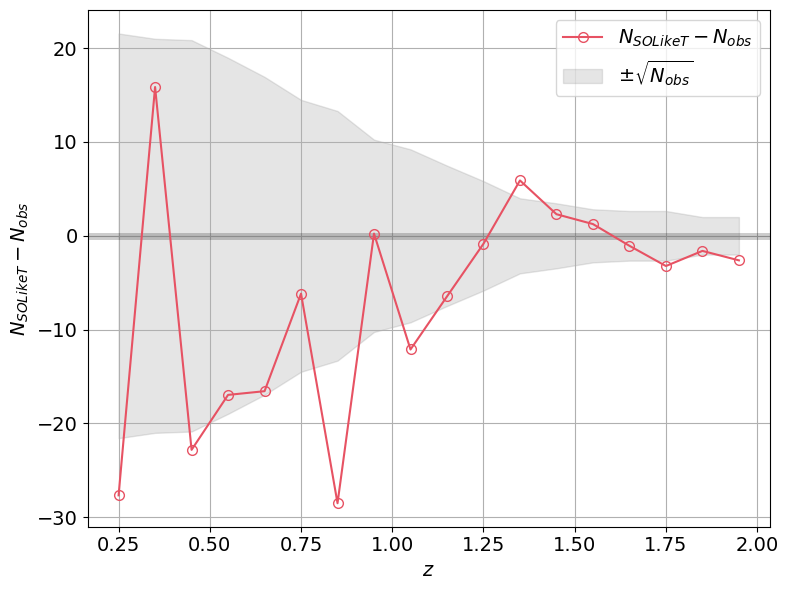

In [27]:
plt.figure(figsize=(8,6))
plt.axhline(y=0, lw=5, c='k', alpha=0.2)
plt.plot(z[2:], Nz[2:]-catNz[2:], color=color_list[9], marker='o', ls='-', mfc='none', ms=7, label='$N_{SOLikeT}-N_{obs}$')
plt.fill_between(z[2:], -np.sqrt(catNz[2:]), np.sqrt(catNz[2:]), alpha=0.2, color='gray', label='$\pm\sqrt{N_{obs}}$')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N_{SOLikeT}-N_{obs}$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('0Nz_SNRbased-inj_obs_diff_ex2zbins.pdf')
plt.savefig('0Nz_SNRbased-inj_obs_diff_ex2zbins.png')
plt.show()

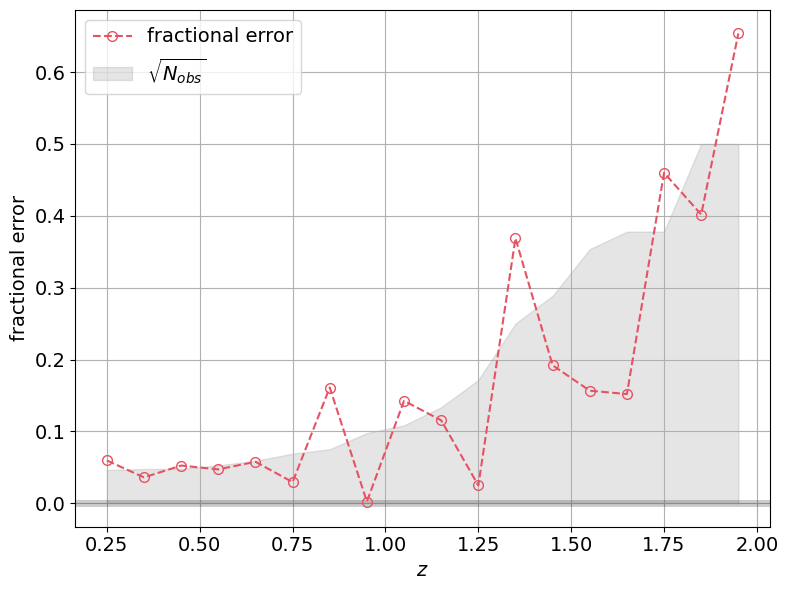

In [28]:
plt.figure(figsize=(8,6))
plt.axhline(y=0, lw=5, c='k', alpha=0.2)
plt.plot(z[2:], np.abs(Nz[2:]/catNz[2:]-1), color=color_list[9], marker='o', ls='--', mfc='none', ms=7, label='fractional error')
plt.fill_between(z[2:], 0, np.sqrt(catNz[2:])/catNz[2:], alpha=0.2, color='gray', label='$\sqrt{N_{obs}}$')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('fractional error', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
#plt.xlim(0, 2.0)
plt.grid()
plt.tight_layout()
plt.savefig('0Nz_SNRbased-inj_obs_frac_ex2zbins.pdf')
plt.savefig('0Nz_SNRbased-inj_obs_frac_ex2zbins.png')
plt.show()

In [29]:
# without first two redshift bins

Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

Nq = np.zeros(len(q))
catNq = np.zeros(len(q))
for i in range(len(q)):
    Nq[i] = Nzq[2:,i].sum()    
    catNq[i] = catNzq[2:,i].sum()

 Total predicted 2D N = 2914.866332304512
Number of clusters in redshift bin 0: 19.221338664465883.
Number of clusters in redshift bin 1: 303.66031427024393.
Number of clusters in redshift bin 2: 437.3405080937954.
Number of clusters in redshift bin 3: 456.85717205043443.
Number of clusters in redshift bin 4: 412.1891190946041.
Number of clusters in redshift bin 5: 343.04635461352007.
Number of clusters in redshift bin 6: 270.4412194904809.
Number of clusters in redshift bin 7: 203.83736665016897.
Number of clusters in redshift bin 8: 148.50011255777852.
Number of clusters in redshift bin 9: 105.23886818800673.
Number of clusters in redshift bin 10: 72.88556197695006.
Number of clusters in redshift bin 11: 49.540326533697474.
Number of clusters in redshift bin 12: 33.155855467111195.
Number of clusters in redshift bin 13: 21.899709598785485.
Number of clusters in redshift bin 14: 14.303248384509745.
Number of clusters in redshift bin 15: 9.253132442556007.
Number of clusters in redshif

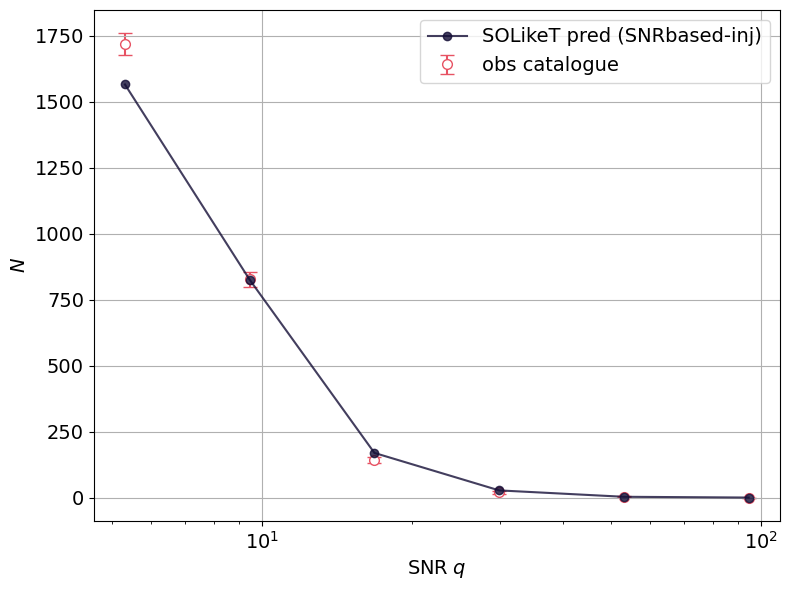

In [30]:
plt.figure(figsize=(8,6))
plt.plot(q, Nq, color=color_list[0], marker='o', alpha=0.8, label='SOLikeT pred (SNRbased-inj)')
plt.errorbar(q, catNq, yerr=np.sqrt(catNq), color=color_list[9], fmt='o', ms=7, mfc='white', zorder=0, capsize=5, capthick=1, ls='none', alpha=1, label='obs catalogue')
plt.xlabel('SNR $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(0, 2.0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('0Nq_SNRbased-inj_ex2zbins.pdf')
plt.savefig('0Nq_SNRbased-inj_ex2zbins.png')
plt.show()

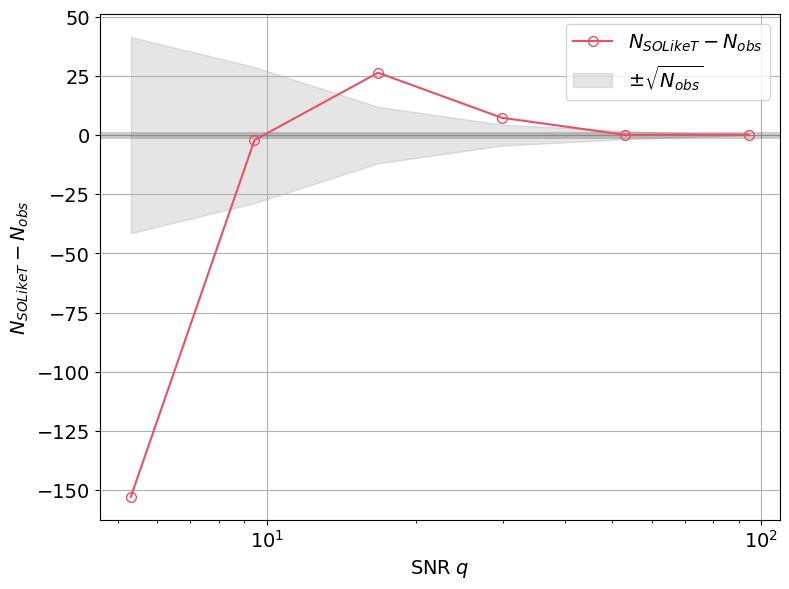

In [31]:
plt.figure(figsize=(8,6))
plt.axhline(y=0, lw=5, c='k', alpha=0.2)
plt.plot(q, Nq-catNq, color=color_list[9], marker='o', ls='-', mfc='none', ms=7, label='$N_{SOLikeT}-N_{obs}$')
plt.fill_between(q, -np.sqrt(catNq), np.sqrt(catNq), alpha=0.2, color='gray', label='$\pm\sqrt{N_{obs}}$')
plt.xlabel('SNR $q$', fontsize=14)
plt.ylabel('$N_{SOLikeT}-N_{obs}$', fontsize=14)
plt.xscale('log')
# plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('0Nq_SNRbased-inj_obs_diff_ex2zbins.pdf')
plt.savefig('0Nq_SNRbased-inj_obs_diff_ex2zbins.png')
plt.show()

In [32]:
obs = catNq
exp = Nq

chi2 = (np.power(obs - exp, 2) / exp).sum()

print("chi2 : ", chi2)
print("dof : ", len(exp))

chi2 :  21.20431647685156
dof :  6


In [33]:
obs = catNz[2:]
exp = Nz[2:]

chi2 = (np.power(obs - exp, 2) / exp).sum()

print("chi2 : ", chi2)
print("dof : ", len(exp))

chi2 :  25.02280668624213
dof :  18


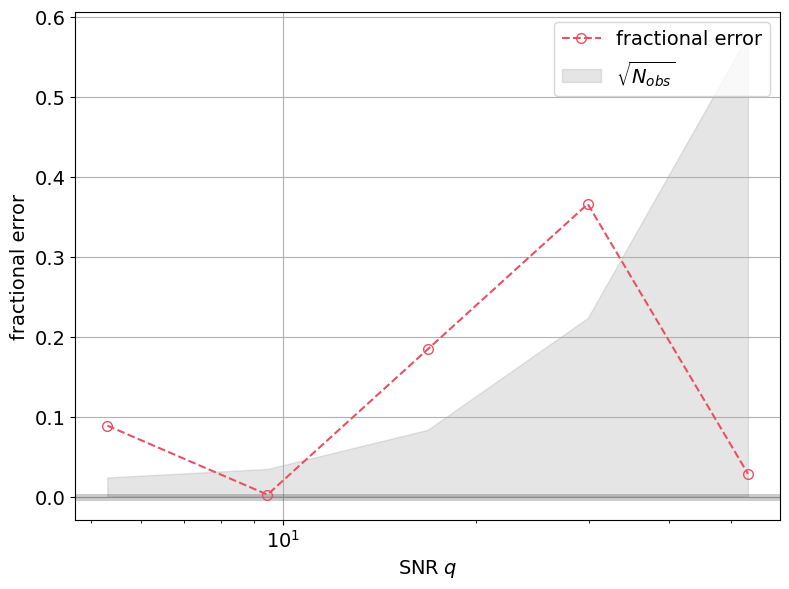

In [34]:
plt.figure(figsize=(8,6))
plt.axhline(y=0, lw=5, c='k', alpha=0.2)
plt.plot(q, np.abs(Nq/catNq-1), color=color_list[9], marker='o', ls='--', mfc='none', ms=7, label='fractional error')
plt.fill_between(q, 0, np.sqrt(catNq)/catNq, alpha=0.2, color='gray', label='$\sqrt{N_{obs}}$')
plt.xlabel('SNR $q$', fontsize=14)
plt.ylabel('fractional error', fontsize=14)
plt.xscale('log')
# plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
#plt.xlim(0, 2.0)
plt.grid()
plt.tight_layout()
plt.savefig('0Nq_SNRbased-inj_obs_frac_ex2zbins.pdf')
plt.savefig('0Nq_SNRbased-inj_obs_frac_ex2zbins.png')
plt.show()

In [35]:
q

array([ 5.30884444,  9.44060876, 16.78804018, 29.85382619, 53.08844442,
       94.40608763])